In [21]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

y_true = []
y_true_author = []
auc_scores_author = []
auc_scores = []

with open('/Users/andywang/Documents/cs145_project_repo/train_author_inference_labels.json', 'r') as f:
    data = json.load(f)
    for author_id, values in data.items():
        y_true_author.append([])
        for key, val in values["papers"].items():
            y_true.append(val)
            y_true_author[-1].append(val)

with open('/Users/andywang/Documents/cs145_project_repo/result-text-20240610-185727-3e-5.json', 'r') as f:
    data = json.load(f)
    for author_id, values in data.items():
        auc_scores_author.append([])
        for key, val in values.items():
            auc_scores.append(val)
            auc_scores_author[-1].append(val)

In [44]:
FPR, TPR, thresholds = roc_curve(y_true, auc_scores)

error_rate = FPR + (1 - TPR)

error_rate

array([1.        , 0.99992906, 0.99510534, ..., 0.99578697, 0.99571603,
       1.        ])

In [45]:
# FPR, TPR, thresholds = roc_curve(y_true, auc_scores)

# error_rate = FPR + (1 - TPR)
# num_errors_total = len(y_true) * error_rate

AUCs = []

for labels, preds in zip(y_true_author, auc_scores_author):
    FPR, TPR, thresholds = roc_curve(labels, preds)
    error_rate = np.array(FPR) + (1 - np.array(TPR))
    # num_errors = len(labels) * error_rate
    AUCs.append(auc(FPR, TPR) * error_rate)


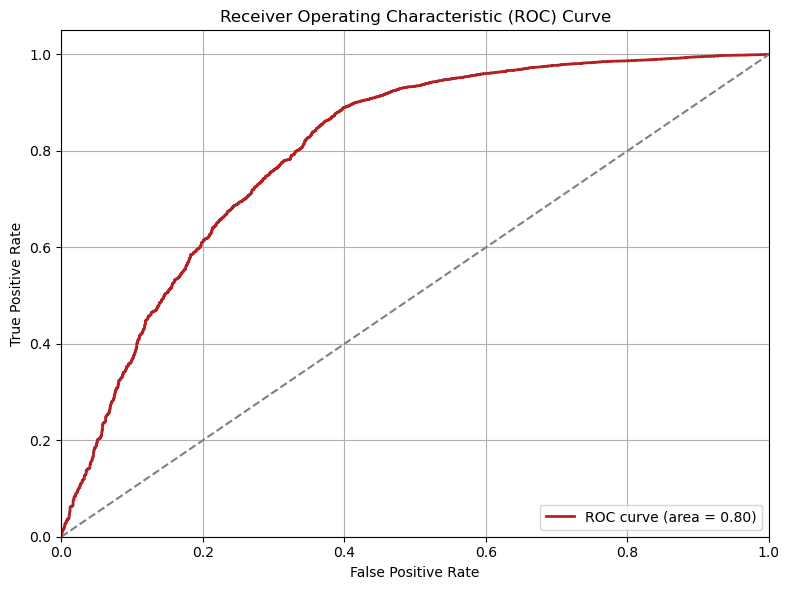

In [3]:
fpr, tpr, thresholds = roc_curve(y_true, auc_scores)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='firebrick', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

plt.show()